In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.layers import TextVectorization, Embedding, MaxPooling2D, LSTM, SpatialDropout1D, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.data import Dataset

# Data Loading

In [2]:
df_dev = pd.read_csv("dataset\subtaskB_clean_dev_cased_3col.csv")
df_dev.head()

,comment_text,topic,conspiracy
0,"Siamo davanti ad una prova, e non solo di quoz...",Qanon,1
1,La storia dei 2 bimbi di Bergamo - vaccini: qu...,Covid,0
2,L'avete capito che non toglieranno il green pa...,Covid,0
3,Quindi la farsa dello spazio e della terra a ...,Terra Piatta,3
4,"In breve tempo, per accedere a Internet, sarà ...",Qanon,1


In [3]:
list(df_dev['comment_text'])

['Siamo davanti ad una prova, e non solo di quoziente intellettivo, ma spirituale. Qui lintelligenza non centra, è questione di apertura mentale, di aver il coraggio di mettere in discussione il sistema, di crearsi la propria opinione da soli, facendo ognuno le proprie ricerche, fidandosi del proprio istinto, delle proprie sensazioni ed usando il discernimento, senza bersi a priori quello che il sistema ci vende ogni giorno. Vuol dire rimettere in gioco tutto, il nostro passato, la nostra istruzione, le nostre credenze. Allinizio è dura, molto dura, ma poi ti senti libero. La gente si sta svegliando, ma ognuno ha i propri tempi, vanno rispettati. Capisco che per molti sia frustrante, ma rendetevi conto che siete fortunati, siete liberi con tutti i costi del caso. Potrete raccontare ai vostri figli, ai vostri nipoti quello che avete fatto in questi tempi bui',
 'La storia dei 2 bimbi di Bergamo - vaccini: qusto giornale non accenna neppure alla strana coincidenza',
 "L'avete capito che 

In [4]:
df_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_text  810 non-null    object
 1   topic         810 non-null    object
 2   conspiracy    810 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.1+ KB


In [5]:
df_dev.conspiracy.value_counts()

conspiracy
0    435
1    242
3     76
2     57
Name: count, dtype: int64

Il task è sbilanciato.

In [6]:
df_dev.iloc[(1, 0)]

'La storia dei 2 bimbi di Bergamo - vaccini: qusto giornale non accenna neppure alla strana coincidenza'

# Additional Text Preprocessing

In [7]:
import re
import nltk

In [8]:
from nltk.corpus import stopwords

In [9]:
print(stopwords.words('italian'))

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('italian'))

In [11]:
def clean_text(text):
    """ text: a string
        return: modified initial string """
    text = text.lower() # lowercase text
    text = re.sub(r'[/(){}\[\]\|@,;]', ' ', text) # substitute the matched string with space.
    text = re.sub(r'[#+_]', '', text) # substitute bad symbols with nothing. 
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df_dev['comment_text'] = df_dev['comment_text'].apply(clean_text)
df_dev['comment_text'] = df_dev['comment_text'].str.replace('\d+', '')

In [12]:
df_dev.iloc[(1, 0)]

'storia 2 bimbi bergamo - vaccini: qusto giornale accenna neppure strana coincidenza'

In [13]:
#%pip install wordcloud

In [14]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [15]:
import matplotlib.pyplot as plt

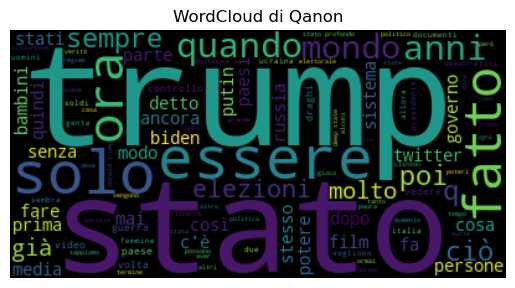

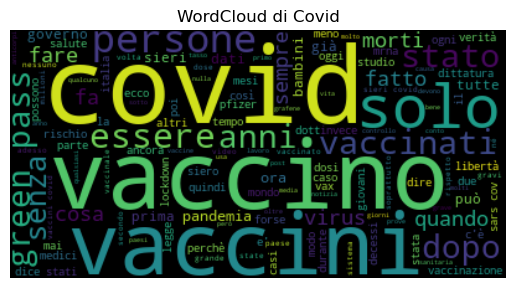

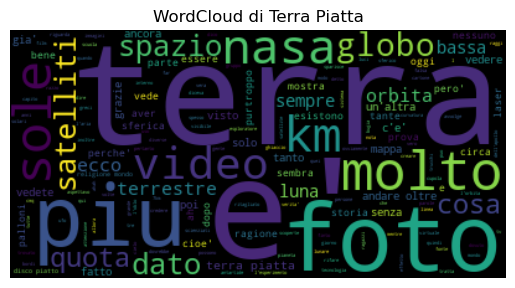

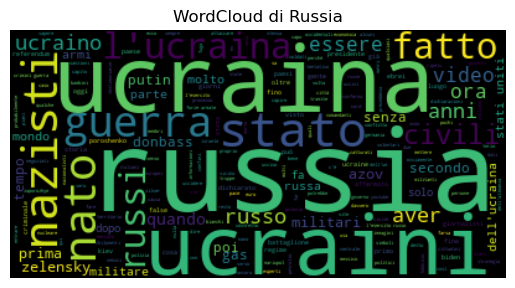

In [16]:
for topic in df_dev.topic.unique():
    text = ''
    for post in list(df_dev[df_dev['topic'] == topic].comment_text):
        text += post
    cloud = WordCloud(#width=520,
                      #height=260,
                      stopwords=STOPWORDS,
                      #max_font_size=50,
                      #background_color = "black", colormap = 'Pastel1'
                     ).generate(text)
    #plt.figure(figsize=(16,10))
    plt.imshow(cloud, interpolation = 'bilinear')
    plt.axis('off') # turn off axis
    plt.title(f'WordCloud di {topic}')
    plt.show()

In [17]:
max_length = 0
for post in list(df_dev.comment_text):
    post_length = len(post.split())
    # print(post_length)
    if post_length > max_length:
        max_length = post_length

In [18]:
max_length

369

In [19]:
X_dev = df_dev.comment_text.values

In [20]:
y_dev = df_dev.conspiracy.values

In [21]:
len(X_dev), len(y_dev)

(810, 810)

# Data Splitting

In [22]:
# Extract a training & validation split
validation_split = 0.3
num_validation_samples = int(validation_split * len(X_dev))
num_validation_samples

243

In [23]:
X_train = X_dev[:-num_validation_samples]
len(X_train)

567

In [24]:
num_test_samples = int(810*0.09)
num_test_samples

72

In [25]:
X_val = X_dev[-num_validation_samples:-num_test_samples]
len(X_val)

171

In [26]:
y_train = y_dev[:-num_validation_samples]
len(y_train)

567

In [28]:
y_val = y_dev[-num_validation_samples:-num_test_samples]
len(y_val)

171

In [29]:
X_test = X_dev[-num_test_samples:]
y_test = y_dev[-num_test_samples:]
len(X_test), len(y_test)

(72, 72)

# Text Vectorization

In [30]:
vectorize_layer = TextVectorization(max_tokens=20000, # Max vocabulary size (to specifiy when adapting a vocabulary)
                                    output_sequence_length=max_length) # output dim padded or truncated => tensor of shape (batch_size, output_sequence_length)
text_ds = Dataset.from_tensor_slices(X_train)
text_ds

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>

In [31]:
(list(text_ds.as_numpy_iterator()))[0]

b'davanti prova solo quoziente intellettivo spirituale. qui lintelligenza centra questione apertura mentale aver coraggio mettere discussione sistema crearsi propria opinione soli ognuno proprie ricerche fidandosi proprio istinto proprie sensazioni usando discernimento senza bersi priori sistema vende ogni giorno. vuol dire rimettere gioco passato istruzione credenze. allinizio dura molto dura poi senti libero. gente svegliando ognuno propri tempi vanno rispettati. capisco molti frustrante rendetevi conto fortunati liberi costi caso. potrete raccontare figli nipoti fatto tempi bui'

text_ds contiene tutti i post, ogni post è di tipo bytes.

In [32]:
vectorize_layer.adapt(text_ds.batch(64))

In [33]:
vectorize_layer.get_vocabulary()[:15]

['',
 '[UNK]',
 'solo',
 'essere',
 'anni',
 'stato',
 'vaccino',
 'vaccini',
 'dopo',
 'persone',
 'quando',
 'covid',
 'ora',
 'covid19',
 'sempre']

In [34]:
vocabulary = vectorize_layer.get_vocabulary()
word_index = dict(zip(vocabulary, range(len(vocabulary))))
len(vocabulary)

8495

## Word Embeddings

In [35]:
embedding_dim = 128

In [36]:
embeddings_path = '..\..\itwac128.txt'

In [37]:
def load_word_embeddings(emb_path):
    '''crea un dizionario contenente gli embedding di parole presente nel file src_path'''
    embeddings = dict() # dizionario che conterrà gli embedding
    for line in open(emb_path, 'r'):
        line = line.strip().split('\t')
        word = line[0]
        embedding = line[1:]
        embedding = [float(comp) for comp in embedding] # convertiamo le componenti dell'embedding in float
        embeddings[word] = np.asarray(embedding) # trasformiamo la lista delle componenti in un vettore di numpy
    return embeddings

In [38]:
embeddings = load_word_embeddings(embeddings_path)

In [39]:
len(embeddings)

1247492

In [37]:
len(embeddings[','])

128

### Creazione di una matrice di embeddings

Now, let's prepare a corresponding embedding matrix that we can use in a Keras Embedding layer. It's a simple NumPy matrix where entry at index i is the embedding for the word of index i in our vectorizer's vocabulary.

In [38]:
len(vocabulary)

9147

In [39]:
def embedding_init(shape, dtype):
    num_tokens = shape[0]
    embedding_dim = shape[1]
    #num_tokens = len(vocabulary) + 2
    #embedding_dim = 128
    hits = 0
    misses = 0
    # Prepare embedding matrix
    embedding_matrix = np.zeros((num_tokens, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings.get(word)
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            # This includes the representation for "padding" and "OOV"
            embedding_matrix[i] = embedding_vector
            hits += 1
        else:
            misses += 1
    # print("Converted %d words (%d misses)" % (hits, misses))
    return embedding_matrix

# Model Building

In [40]:
from tensorflow.keras import Input

In [41]:
x_train = vectorize_layer(np.array([[s] for s in X_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in X_val])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)

In [42]:
dropout_values = []#0.05, 0.1, 0.2]
LSTM_HIDDEN_SIZE = [50, 100, 150, 200]
dense_size = [25, 50, 100, 150]

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_6 (LSTM)               (None, 50)                35800     
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 4)                 104       
                                                                 
Total params: 1,207,995
Trainable params: 1,207,995
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 5s 129ms/step - loss: 1.3706 - accuracy: 0.5108 - val_loss: 1.3452 - val_accuracy: 0.6420
Epoch 2/10
21/21 [===========

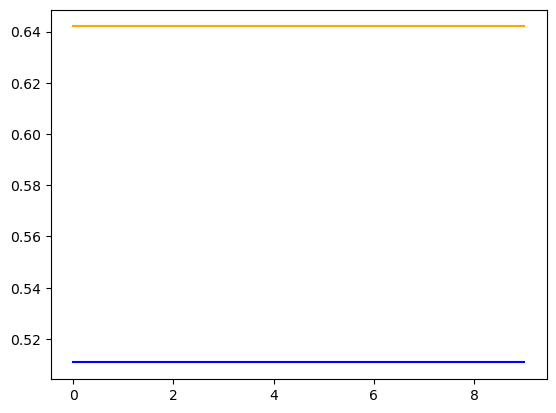

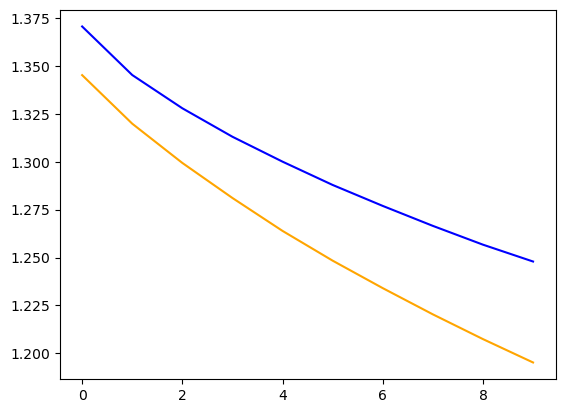

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_7 (LSTM)               (None, 50)                35800     
                                                                 
 dense_4 (Dense)             (None, 50)                2550      
                                                                 
 dense_5 (Dense)             (None, 4)                 204       
                                                                 
Total params: 1,209,370
Trainable params: 1,209,370
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 6s 163ms/step - loss: 1.3671 - accuracy: 0.5108 - val_loss: 1.3351 - val_accuracy: 0.6420
Epoch 2/10
21/21 [===========

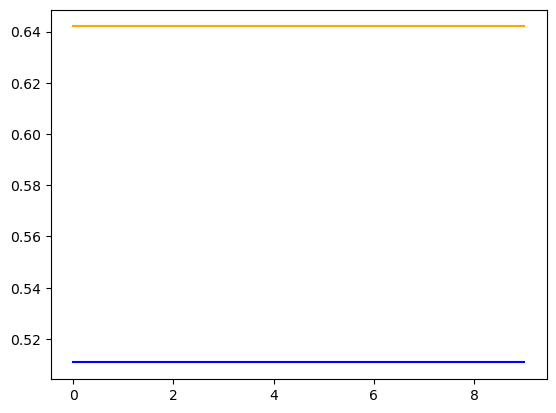

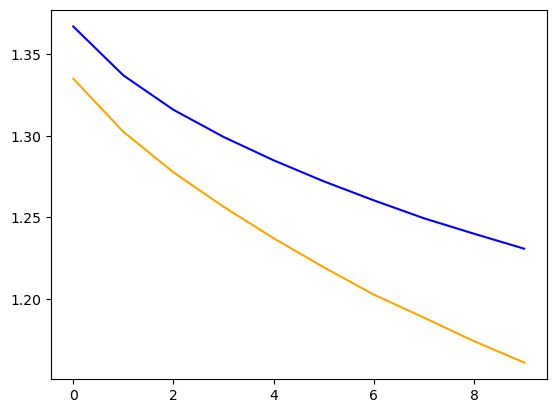

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_8 (LSTM)               (None, 50)                35800     
                                                                 
 dense_6 (Dense)             (None, 100)               5100      
                                                                 
 dense_7 (Dense)             (None, 4)                 404       
                                                                 
Total params: 1,212,120
Trainable params: 1,212,120
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 6s 164ms/step - loss: 1.3738 - accuracy: 0.5108 - val_loss: 1.3533 - val_accuracy: 0.6420
Epoch 2/10
21/21 [===========

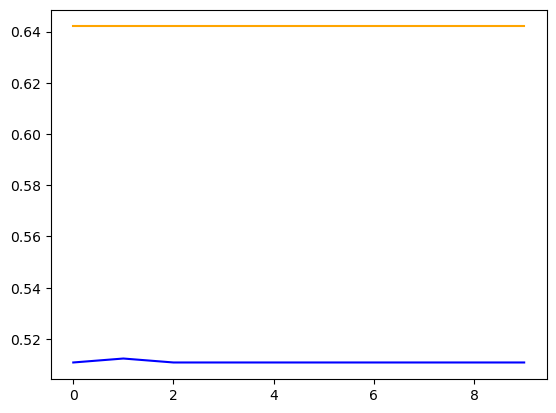

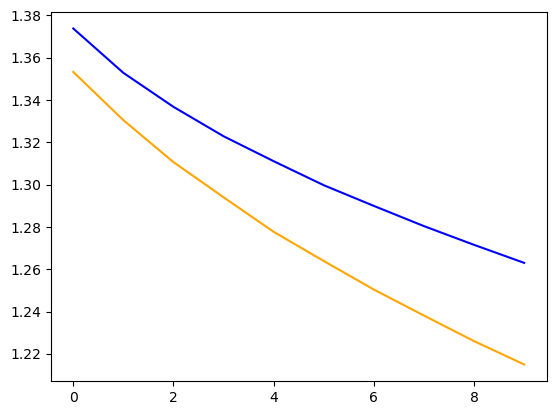

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_9 (LSTM)               (None, 100)               91600     
                                                                 
 dense_8 (Dense)             (None, 25)                2525      
                                                                 
 dense_9 (Dense)             (None, 4)                 104       
                                                                 
Total params: 1,265,045
Trainable params: 1,265,045
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 6s 204ms/step - loss: 1.3673 - accuracy: 0.5108 - val_loss: 1.3385 - val_accuracy: 0.6420
Epoch 2/10
21/21 [===========

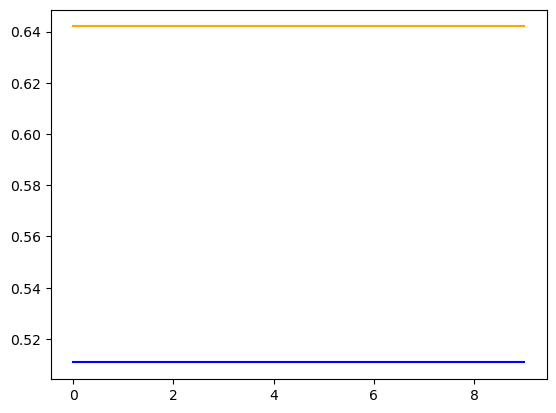

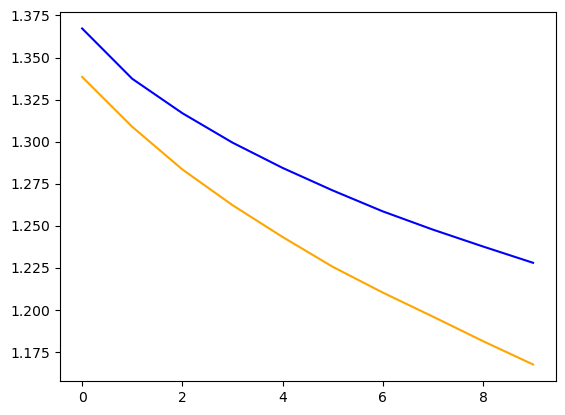

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_10 (LSTM)              (None, 100)               91600     
                                                                 
 dense_10 (Dense)            (None, 50)                5050      
                                                                 
 dense_11 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,267,670
Trainable params: 1,267,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 9s 320ms/step - loss: 1.3703 - accuracy: 0.5108 - val_loss: 1.3439 - val_accuracy: 0.6420
Epoch 2/10
21/21 [===========

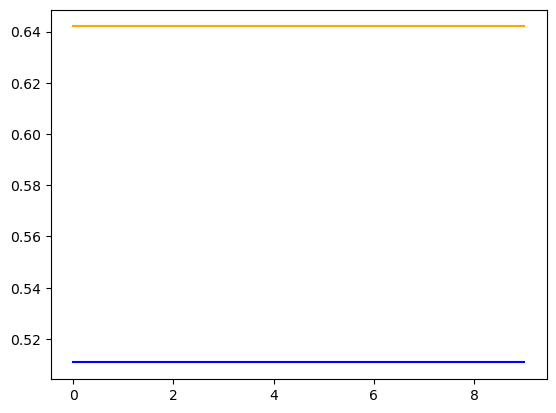

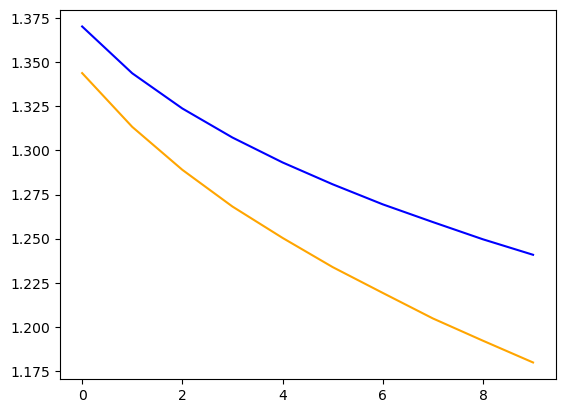

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_11 (LSTM)              (None, 100)               91600     
                                                                 
 dense_12 (Dense)            (None, 100)               10100     
                                                                 
 dense_13 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,272,920
Trainable params: 1,272,920
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 12s 387ms/step - loss: 1.3653 - accuracy: 0.5108 - val_loss: 1.3323 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

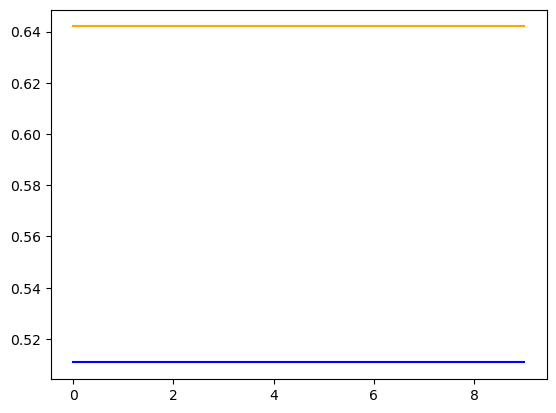

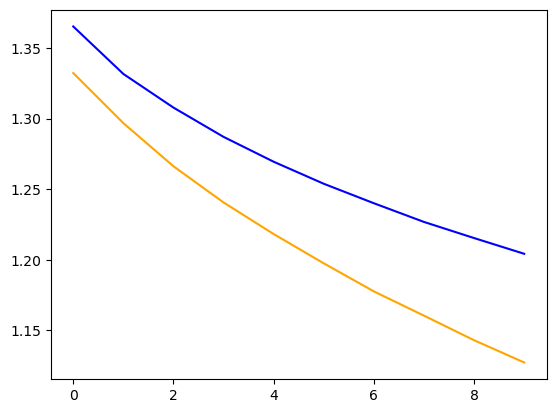

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 364, 128)          1170816   
                                                                 
 lstm_12 (LSTM)              (None, 150)               167400    
                                                                 
 dense_14 (Dense)            (None, 25)                3775      
                                                                 
 dense_15 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,342,095
Trainable params: 1,342,095
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 13s 494ms/step - loss: 1.3703 - accuracy: 0.5108 - val_loss: 1.3469 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

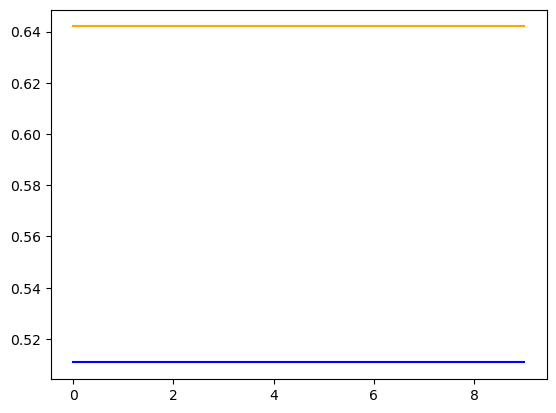

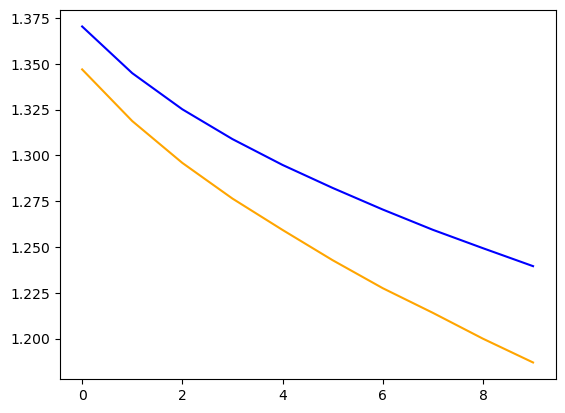

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_13 (LSTM)              (None, 150)               167400    
                                                                 
 dense_16 (Dense)            (None, 50)                7550      
                                                                 
 dense_17 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,345,970
Trainable params: 1,345,970
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 17s 595ms/step - loss: 1.3694 - accuracy: 0.5108 - val_loss: 1.3447 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

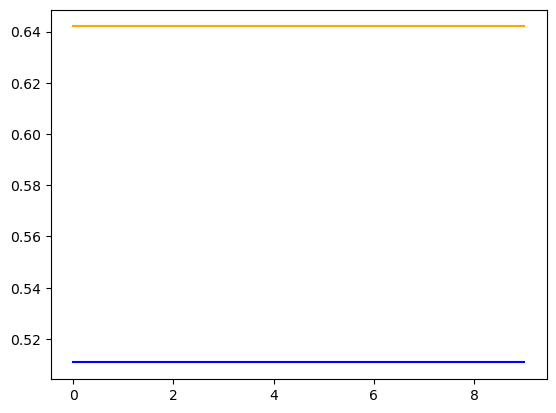

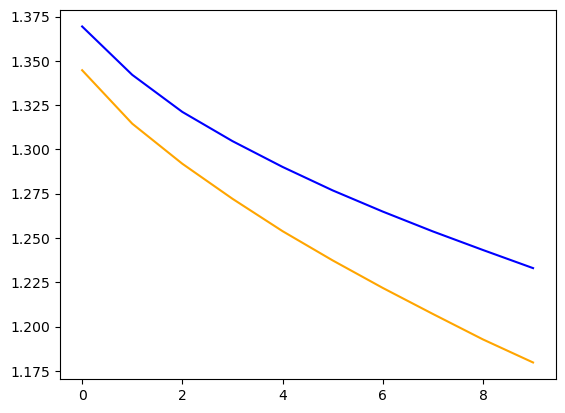

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_14 (LSTM)              (None, 150)               167400    
                                                                 
 dense_18 (Dense)            (None, 100)               15100     
                                                                 
 dense_19 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,353,720
Trainable params: 1,353,720
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 12s 476ms/step - loss: 1.3682 - accuracy: 0.5123 - val_loss: 1.3407 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

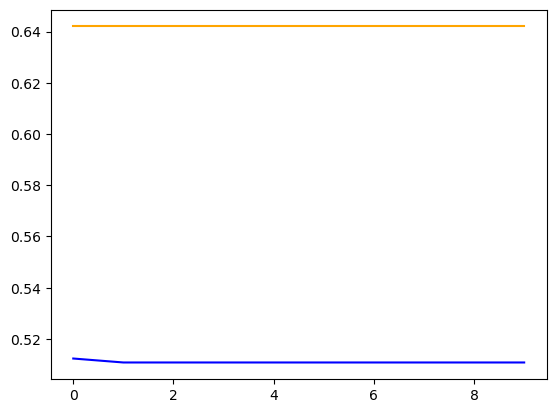

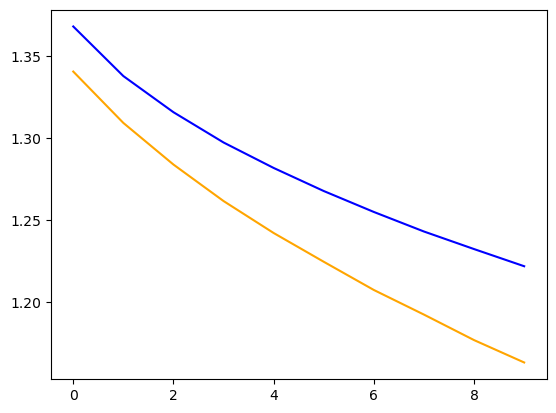

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_15 (LSTM)              (None, 50)                35800     
                                                                 
 dense_20 (Dense)            (None, 25)                1275      
                                                                 
 dense_21 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,207,995
Trainable params: 1,207,995
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 8s 229ms/step - loss: 1.3674 - accuracy: 0.4691 - val_loss: 1.3391 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

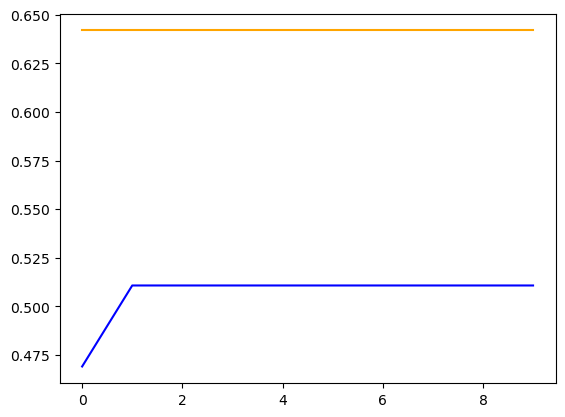

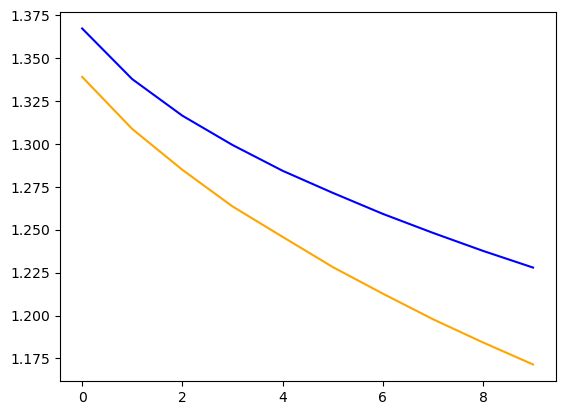

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_16 (LSTM)              (None, 50)                35800     
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,209,370
Trainable params: 1,209,370
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 7s 224ms/step - loss: 1.3633 - accuracy: 0.5108 - val_loss: 1.3275 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

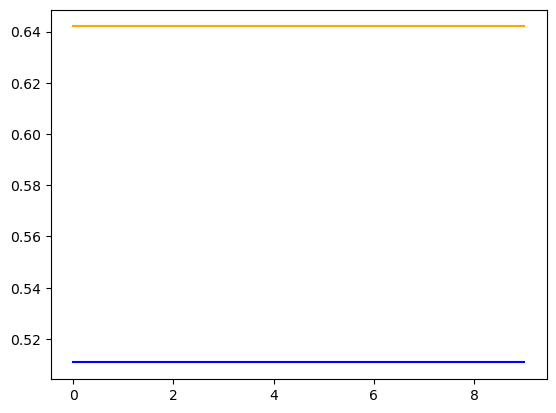

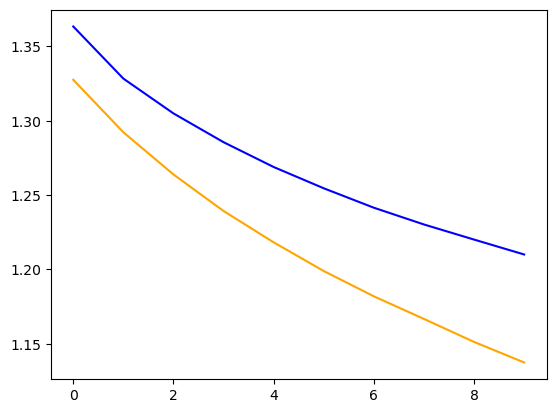

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_17 (LSTM)              (None, 50)                35800     
                                                                 
 dense_24 (Dense)            (None, 100)               5100      
                                                                 
 dense_25 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,212,120
Trainable params: 1,212,120
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 7s 241ms/step - loss: 1.3720 - accuracy: 0.4954 - val_loss: 1.3485 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

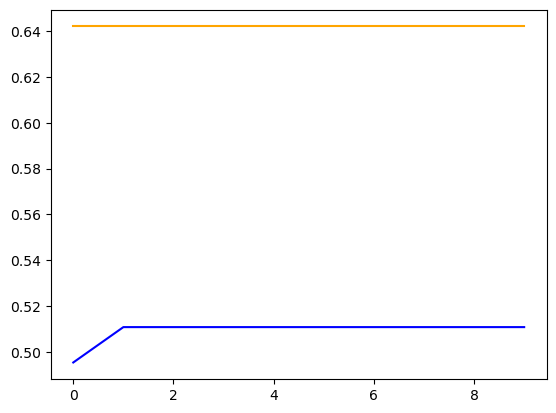

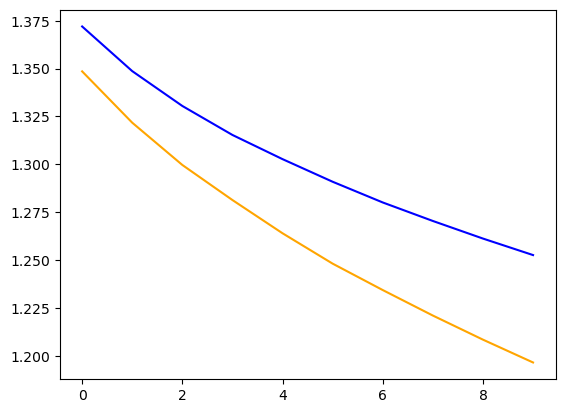

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_18 (LSTM)              (None, 100)               91600     
                                                                 
 dense_26 (Dense)            (None, 25)                2525      
                                                                 
 dense_27 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,265,045
Trainable params: 1,265,045
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 9s 326ms/step - loss: 1.3734 - accuracy: 0.5108 - val_loss: 1.3549 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

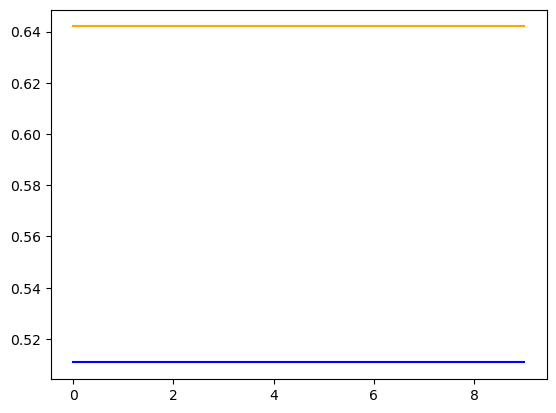

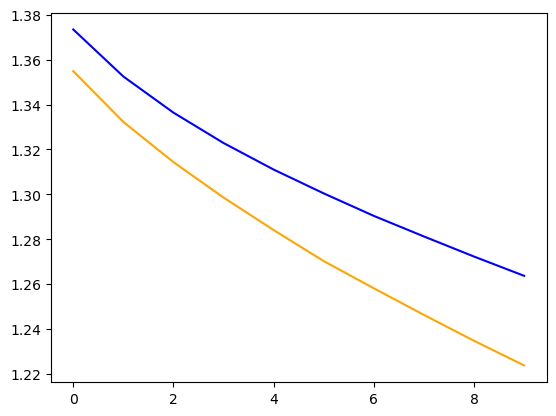

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_19 (LSTM)              (None, 100)               91600     
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,267,670
Trainable params: 1,267,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 9s 298ms/step - loss: 1.3657 - accuracy: 0.5108 - val_loss: 1.3338 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

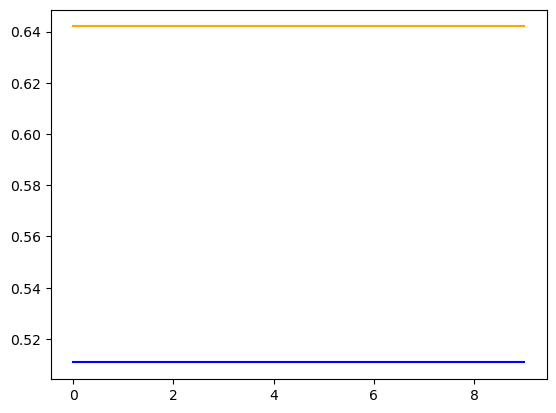

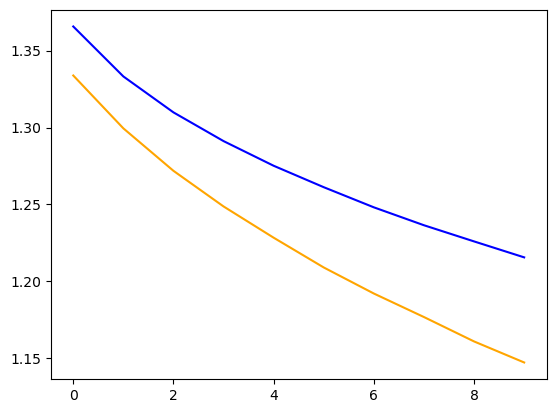

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_20 (LSTM)              (None, 100)               91600     
                                                                 
 dense_30 (Dense)            (None, 100)               10100     
                                                                 
 dense_31 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,272,920
Trainable params: 1,272,920
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 8s 297ms/step - loss: 1.3683 - accuracy: 0.5108 - val_loss: 1.3385 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

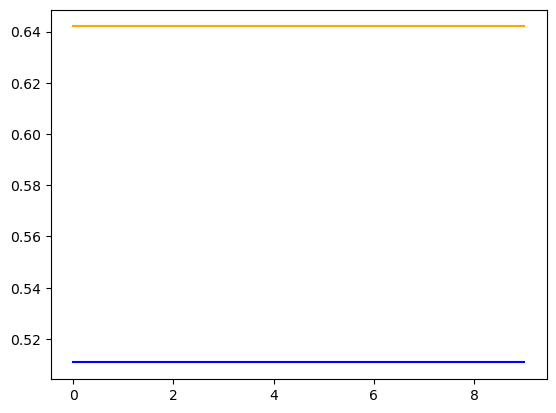

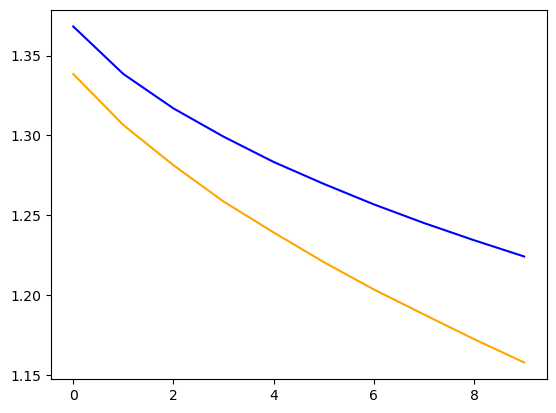

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_21 (LSTM)              (None, 150)               167400    
                                                                 
 dense_32 (Dense)            (None, 25)                3775      
                                                                 
 dense_33 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,342,095
Trainable params: 1,342,095
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 13s 514ms/step - loss: 1.3674 - accuracy: 0.3796 - val_loss: 1.3419 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

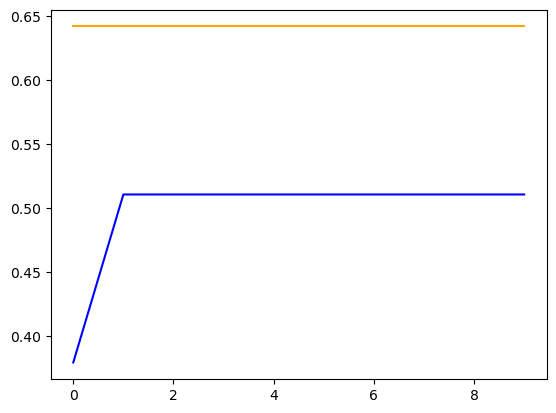

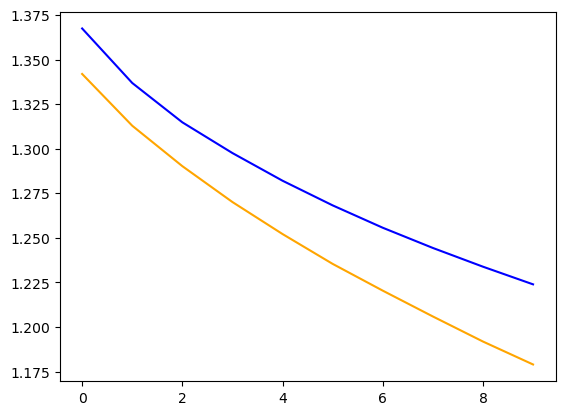

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_22 (LSTM)              (None, 150)               167400    
                                                                 
 dense_34 (Dense)            (None, 50)                7550      
                                                                 
 dense_35 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,345,970
Trainable params: 1,345,970
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 14s 542ms/step - loss: 1.3686 - accuracy: 0.5108 - val_loss: 1.3382 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

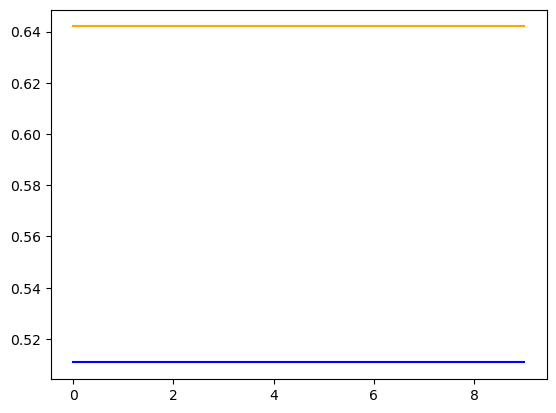

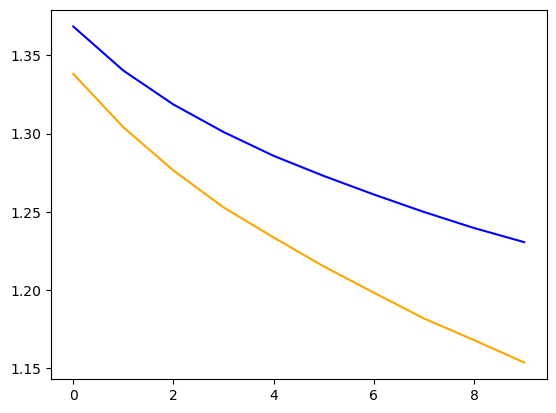

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_23 (LSTM)              (None, 150)               167400    
                                                                 
 dense_36 (Dense)            (None, 100)               15100     
                                                                 
 dense_37 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,353,720
Trainable params: 1,353,720
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 11s 424ms/step - loss: 1.3682 - accuracy: 0.5108 - val_loss: 1.3408 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

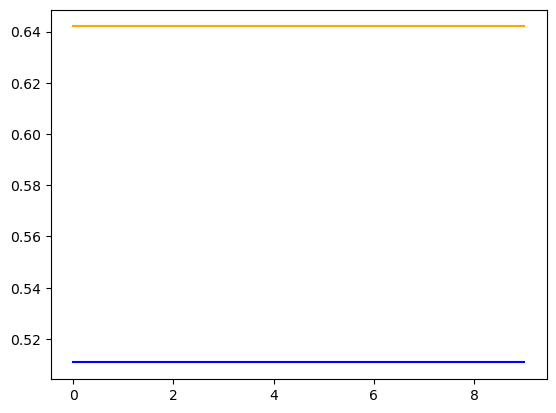

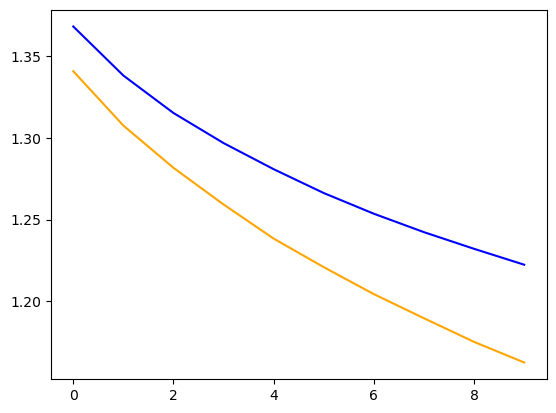

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_21 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_24 (LSTM)              (None, 50)                35800     
                                                                 
 dense_38 (Dense)            (None, 25)                1275      
                                                                 
 dense_39 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,207,995
Trainable params: 1,207,995
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 7s 205ms/step - loss: 1.3741 - accuracy: 0.5123 - val_loss: 1.3541 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

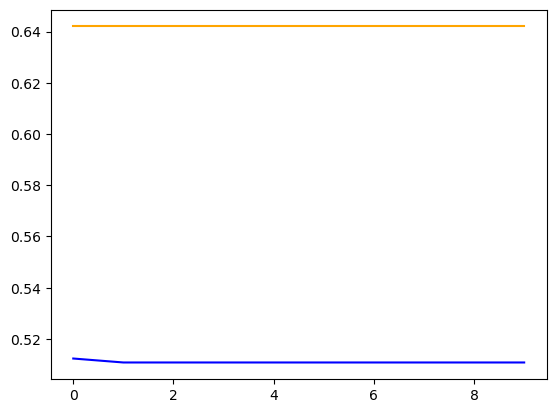

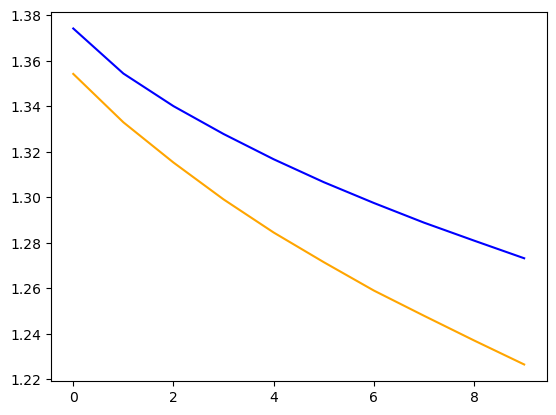

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_25 (LSTM)              (None, 50)                35800     
                                                                 
 dense_40 (Dense)            (None, 50)                2550      
                                                                 
 dense_41 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,209,370
Trainable params: 1,209,370
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 8s 252ms/step - loss: 1.3683 - accuracy: 0.5108 - val_loss: 1.3382 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

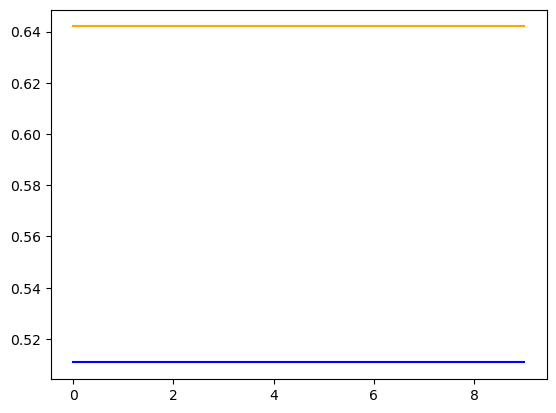

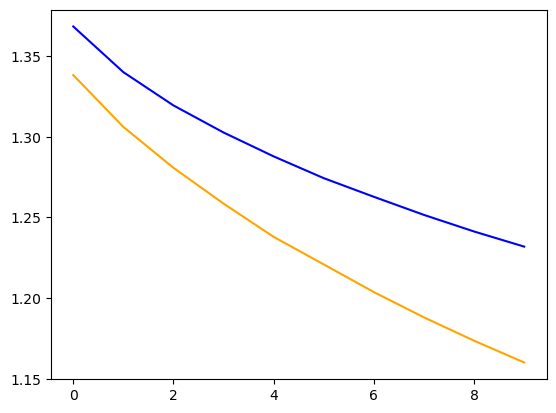

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_23 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_26 (LSTM)              (None, 50)                35800     
                                                                 
 dense_42 (Dense)            (None, 100)               5100      
                                                                 
 dense_43 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,212,120
Trainable params: 1,212,120
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 7s 249ms/step - loss: 1.3700 - accuracy: 0.5108 - val_loss: 1.3454 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

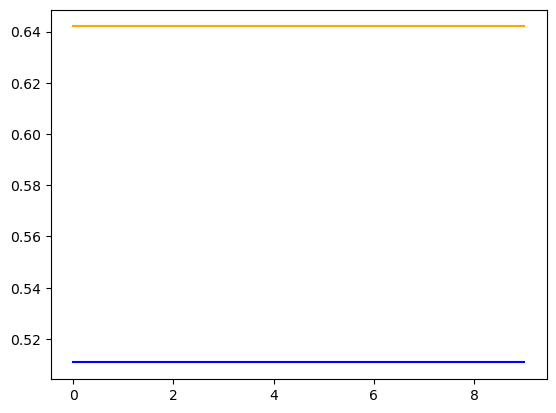

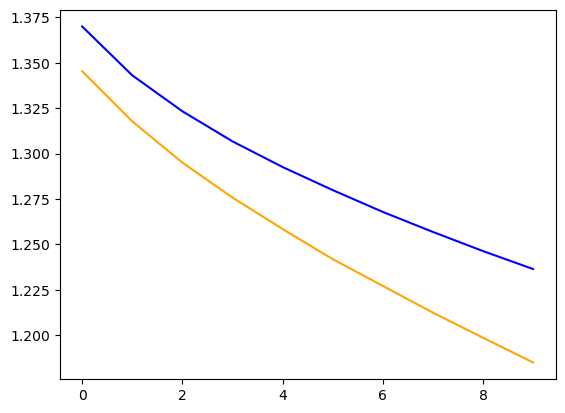

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_24 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_27 (LSTM)              (None, 100)               91600     
                                                                 
 dense_44 (Dense)            (None, 25)                2525      
                                                                 
 dense_45 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,265,045
Trainable params: 1,265,045
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 12s 375ms/step - loss: 1.3691 - accuracy: 0.5108 - val_loss: 1.3387 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

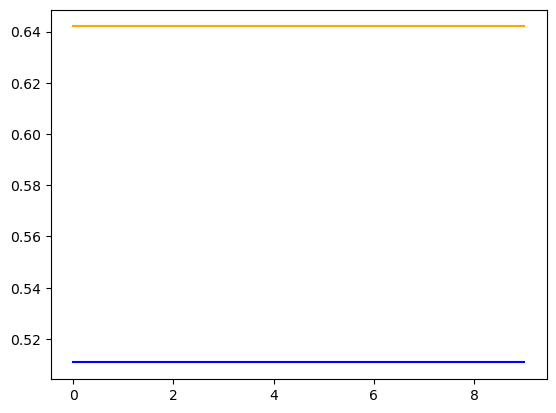

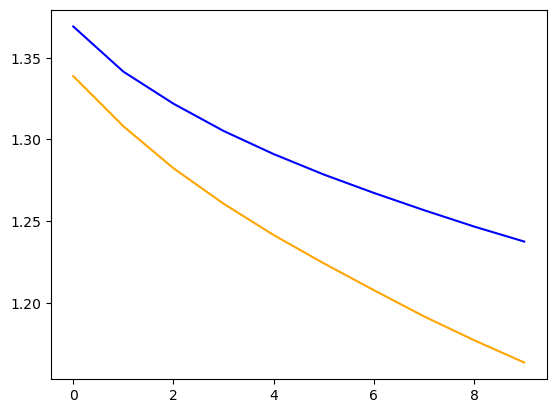

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_28 (LSTM)              (None, 100)               91600     
                                                                 
 dense_46 (Dense)            (None, 50)                5050      
                                                                 
 dense_47 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,267,670
Trainable params: 1,267,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 9s 322ms/step - loss: 1.3657 - accuracy: 0.5123 - val_loss: 1.3355 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

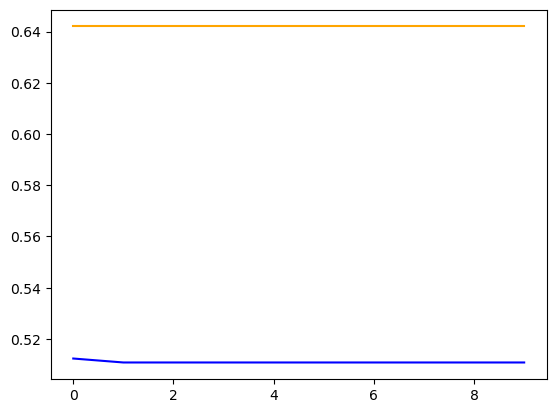

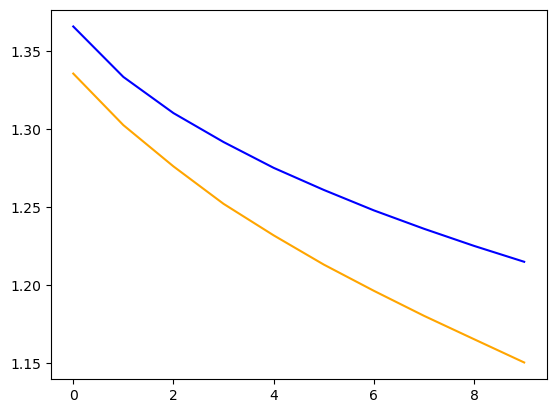

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_29 (LSTM)              (None, 100)               91600     
                                                                 
 dense_48 (Dense)            (None, 100)               10100     
                                                                 
 dense_49 (Dense)            (None, 4)                 404       
                                                                 
Total params: 1,272,920
Trainable params: 1,272,920
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 9s 300ms/step - loss: 1.3713 - accuracy: 0.5108 - val_loss: 1.3472 - val_accuracy: 0.6420
Epoch 2/10
21/21 [==========

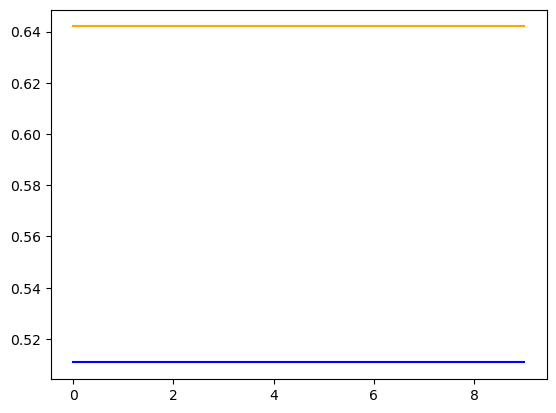

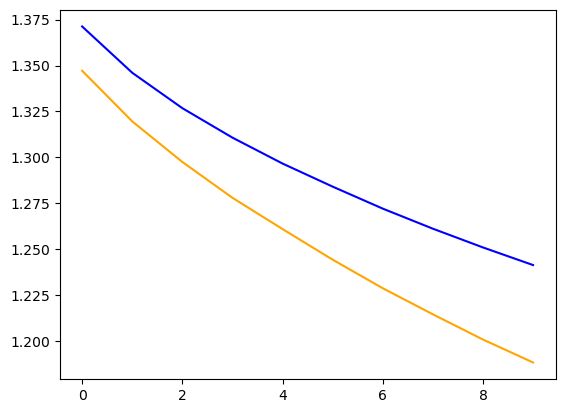

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_27 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_30 (LSTM)              (None, 150)               167400    
                                                                 
 dense_50 (Dense)            (None, 25)                3775      
                                                                 
 dense_51 (Dense)            (None, 4)                 104       
                                                                 
Total params: 1,342,095
Trainable params: 1,342,095
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 17s 576ms/step - loss: 1.3683 - accuracy: 0.4799 - val_loss: 1.3416 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

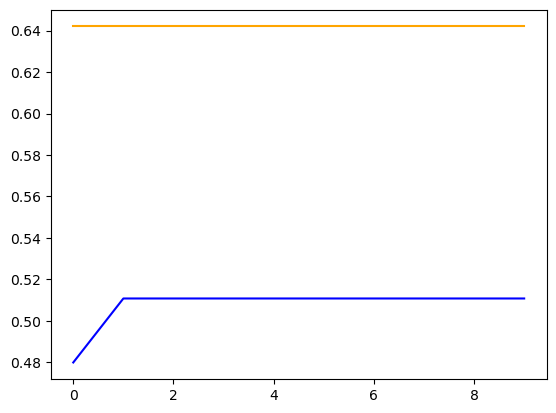

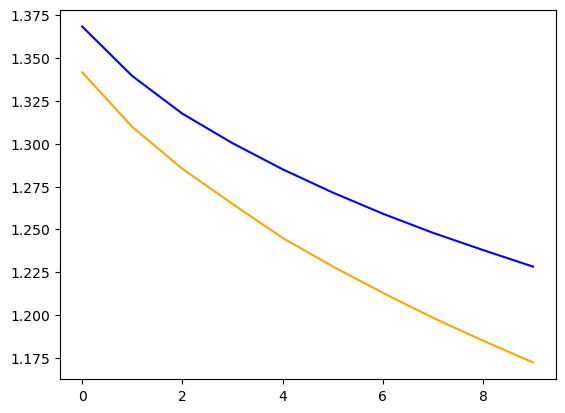

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_28 (Embedding)    (None, 364, 128)          1170816   
                                                                 
 lstm_31 (LSTM)              (None, 150)               167400    
                                                                 
 dense_52 (Dense)            (None, 50)                7550      
                                                                 
 dense_53 (Dense)            (None, 4)                 204       
                                                                 
Total params: 1,345,970
Trainable params: 1,345,970
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
21/21 [==============================] - 14s 504ms/step - loss: 1.3627 - accuracy: 0.4877 - val_loss: 1.3299 - val_accuracy: 0.6420
Epoch 2/10
21/21 [=========

KeyboardInterrupt: 

In [46]:
histories = {}
for dropout_value in dropout_values:
    for lstm_units in LSTM_HIDDEN_SIZE:
        for dense_units in dense_size:
            model = Sequential()
            model.add(Embedding(
                input_dim = len(vocabulary),
                output_dim = embedding_dim,
                embeddings_initializer=embedding_init,
                input_length=max_length)) 
                #mask_zero=True)) # 0-padding should be masked out
            model.add(LSTM(lstm_units)) #, dropout=0.2, recurrent_dropout=0.2))
            #model.add(Dropout(dropout_value))
            model.add(Dense(dense_units))
            model.add(Dense(4, activation='softmax'))
            print(model.summary())
            # plot_model(model, show_shapes=True)
            model.compile(loss='sparse_categorical_crossentropy',
                        optimizer='adagrad',
                        metrics=['accuracy'])
            history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
            histories[f'drop:{dropout_value}_lstm{lstm_units}_dense{dense_units}'] = history.history
            plt.plot(history.history['accuracy'], color='blue')
            plt.plot(history.history['val_accuracy'], color='orange')
            plt.show()
            plt.plot(history.history['loss'], color='blue')
            plt.plot(history.history['val_loss'], color='orange')
            plt.show()

In [50]:
histories['drop:0.05_lstm50_dense25'].history['val_accuracy']

[0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417]

In [51]:
histories_10_epochs = histories

In [53]:
histories_10_epochs['drop:0.05_lstm50_dense25'].history['val_accuracy']

[0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417,
 0.6419752836227417]

In [45]:
model = Sequential()
model.add(Embedding(
                input_dim = len(vocabulary),
                output_dim = embedding_dim,
                embeddings_initializer=embedding_init,
                input_length=max_length)) 
                #mask_zero=True)) # 0-padding should be masked out
            # model.add(SpatialDropout1D(0.2))
model.add(LSTM(100)) #, dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dense(4, activation='softmax'))
print(model.summary())
# plot_model(model, show_shapes=True)
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history_100 = model.fit(x_train, y_train, epochs=100, validation_data=(x_val, y_val))
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='orange')
plt.show()
plt.plot(history.history['loss'], color='blue')
plt.plot(history.history['val_loss'], color='orange')
plt.show()

ValueError: Input 0 of layer "lstm_5" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 100)

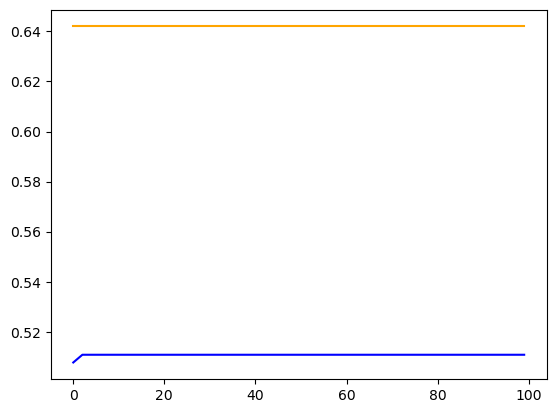

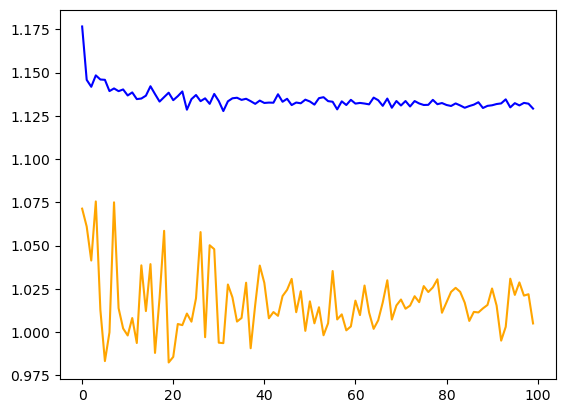

In [55]:
plt.plot(history_100.history['accuracy'], color='blue')
plt.plot(history_100.history['val_accuracy'], color='orange')
plt.show()
plt.plot(history_100.history['loss'], color='blue')
plt.plot(history_100.history['val_loss'], color='orange')
plt.show()

Embedding Layer Arguments

* input_dim: Integer. Size of the vocabulary, i.e. maximum integer index + 1.
* output_dim: Integer. Dimension of the dense embedding.
* embeddings_initializer: Initializer for the embeddings matrix (see keras.initializers).
* embeddings_regularizer: Regularizer function applied to the embeddings matrix (see keras.regularizers).
* embeddings_constraint: Constraint function applied to the embeddings matrix (see keras.constraints).
* mask_zero: Boolean, whether or not the input value 0 is a special "padding" value that should be masked out. This is useful when using recurrent layers which may take variable length input. If this is True, then all subsequent layers in the model need to support masking or an exception will be raised. If mask_zero is set to True, as a consequence, index 0 cannot be used in the vocabulary (input_dim should equal size of vocabulary + 1).
* input_length: Length of input sequences, when it is constant. This argument is required if you are going to connect Flatten then Dense layers upstream (without it, the shape of the dense outputs cannot be computed).
* sparse: If True, calling this layer returns a tf.SparseTensor. If False, the layer returns a dense tf.Tensor. For an entry with no features in a sparse tensor (entry with value 0), the embedding vector of index 0 is returned by default.

LSTM arguments:
* units: Positive integer, dimensionality of the output space.
* activation: Activation function to use. Default: hyperbolic tangent (tanh). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).
* recurrent_activation: Activation function to use for the recurrent step. Default: sigmoid (sigmoid). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).

https://keras.io/examples/nlp/pretrained_word_embeddings/